#============================================================================================================================================
# **Física Teórica 3 (Mecánica Estadística): Teórica 2 - Extras**
#============================================================================================================================================

# Camino al azar
Este notebook genera caminos al azar discretos unidimensionales usando Python. Para ejecutarlo, apreten SHIFT+ENTER en cada celda (en orden, comenzando por la primera). En Google Colaboratory también pueden ejecutar las celdas aprentando el ícono de "play" arriba a la izquierda de cada celda (aparece al poner el dedo o el puntero del mouse sobre los corchetes "[ ]" que dan inicio a cada celda con código). Comenzamos importando NumPy (https://numpy.org/devdocs/user/quickstart.html) y Matplotlib (https://matplotlib.org/3.3.1/tutorials/index.html), y definiendo algunos parámetros para el camino al azar discreto.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Definimos parámetros para el camino al azar:
N = 1000 # Número total de pasos
D = 1    # Tamaño del paso (Delta)
l = 0.45 # Probabilidad de moverse a la izquierda (Prueben cambiar el valor!)
r = 1-l  # Probabilidad de moverse a la derecha

Ahora ejecutamos un camino al azar. Pueden ejecutar esta celda (con SHIFT+ENTER) todas las veces que quieran. Cada vez que la ejecuten van a ver una realización diferente del camino al azar.

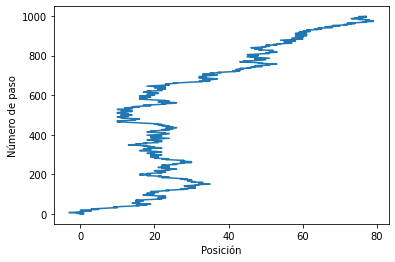

In [ ]:
t = np.arange(N) # Creamos un vector con números crecientes entre 0 y N con el número de paso (o el "tiempo")
x = np.zeros(N)  # Creamos un vector para guardar la posición de la partícula en cada paso
x[0] = 0         # La partícula comienza en el 0

for i in range(1, N):
    ran = random.random()    # Generamos un número al azar entre 0 y 1
    if ran <= r: step =  1*D # Decidimos si nos movemos a la derecha o a la izquierda
    if ran >  r: step = -1*D
    x[i] = x[i-1]+step       # Avanzamos en la dirección indicada

plt.figure()     # Graficamos los resultados
plt.plot(x,t)
plt.xlabel('Posición')
plt.ylabel('Número de paso')
plt.show()

Ahora hacemos un ensamble de caminos al azar. Realizamos un montón de copias ("veces que repetimos el experimento"). Luego de repetir M veces el experimento graficamos la trayectoria para los primeros 20 experimentos, graficamos el desplazamiento medio y la dispersión de todas las trayectorias, y calculamos el histograma normalizado de las posiciones finales (luego de N pasos) para todos los experimentos. Prueben cambiar el número de copias y miren cómo cambia el histograma (cada vez que cambien el valor de M, recuerden apretar SHIFT+ENTER para ejecutar la celda).

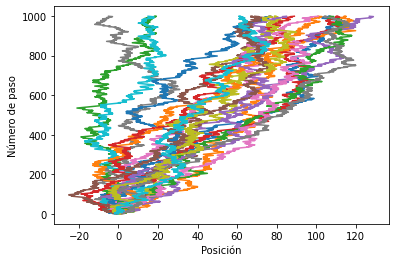

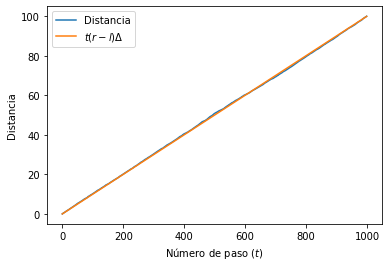

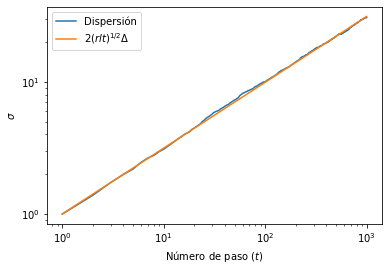

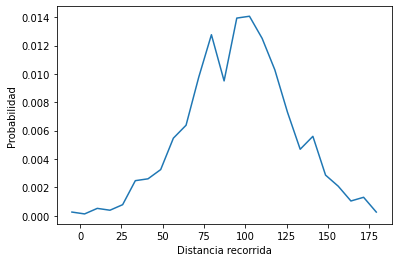

In [ ]:
M = 1000            # Número de copias del camino al azar unidimensional (pueden cambiarlo!)
t = np.arange(N)    # Creamos un vector con números crecientes entre 0 y N con el número de paso (o el "tiempo")
x = np.zeros((N,M)) # Creamos un vector para guardar la posición de la partícula en cada paso y en cada experimento
x[0,:] = 0          # La partícula en el 0 en todos los experimentos

for j in range(0,M-1):       # Repetimos M veces el experimento
  for i in range(1, N):
    ran = random.random()    # Generamos un número al azar entre 0 y 1
    if ran <= r: step =  1*D # Decidimos si nos movemos a la derecha o a la izquierda
    if ran >  r: step = -1*D
    x[i,j] = x[i-1,j]+step   # Avanzamos en la dirección indicada
plt.figure()                 # Graficamos las 20 primeras trayectorias
plt.plot(x[:,0:20],t)
plt.xlabel('Posición')
plt.ylabel('Número de paso')
plt.show()

rmean = np.mean(x,axis=1)                       # Calculamos la posición media de las trayectorias en función del tiempo (np.mean calcula el valor medio)
plt.figure()                                    # Graficamos la posición media y mostramos como referencia una ley lineal con el número de paso t
plt.plot(t,rmean,label=r'Distancia')
plt.plot(t,t*(r-l)*D,label=r'$t (r-l) \Delta$')
plt.legend(loc="upper left")
plt.xlabel(r'Número de paso ($t$)')
plt.ylabel(r'Distancia')
plt.show()
rwstd = np.std(x,axis=1)                            # Calculamos la dispersión en las trayectorias en función del tiempo (np.std calcula la desviación estándar)
plt.figure()                                        # Graficamos la dispersión en función del paso (en log-log), y mostramos como referencia una ley t^(1/2)
plt.loglog(t[1:-1],rwstd[1:-1],label=r'Dispersión')
plt.loglog(t[1:-1],2*D*(r*l*t[1:-1])**.5,label=r'$2 (r l t)^{1/2} \Delta$')
plt.legend(loc="upper left")
plt.xlabel(r'Número de paso ($t$)')
plt.ylabel(r'$\sigma$')
plt.show()
hist, bins = np.histogram(x[-1,:], density=True, bins=25) # Calculamos el histograma de las posiciones finales para todos los experimentos
plt.figure()                                              # Graficamos la función de distribución de probabilidad
plt.plot(bins[0:-1],hist)
plt.xlabel(r'Distancia recorrida')
plt.ylabel(r'Probabilidad')
plt.show()

#———————————————————————————————————————————————————————————————————————————————————————————————

#———————————————————————————————————————————————————————————————————————————————————————————————